Unzip datasets and prepare data:

In [39]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from multi_imbalance.datasets import load_datasets
from multi_imbalance.resampling.MDO import MDO

from multi_imbalance.utils.data import construct_flat_2pc_df

%matplotlib inline
sns.set_style('darkgrid')


dataset = load_datasets()
print(dataset.keys())
dataset = dataset['new_ecoli']
X, y = dataset.data, dataset.target
print(X[:5])
print(y[:5])

odict_keys(['1czysty-cut', '2delikatne-cut', '3mocniej-cut', '4delikatne-bezover-cut', 'balance-scale', 'cleveland', 'cleveland_v2', 'cmc', 'dermatology', 'glass', 'hayes-roth', 'new_ecoli', 'new_led7digit', 'new_vehicle', 'new_winequality-red', 'new_yeast', 'thyroid-newthyroid'])
[[0.49 0.29 0.48 0.5  0.56 0.24 0.35]
 [0.07 0.4  0.48 0.5  0.54 0.35 0.44]
 [0.56 0.4  0.48 0.5  0.49 0.37 0.46]
 [0.59 0.49 0.48 0.5  0.52 0.45 0.36]
 [0.23 0.32 0.48 0.5  0.55 0.25 0.35]]
[0 0 0 0 0]


Resample data using MDO algorithm

In [40]:
clf = MDO(k1_frac=0.5)
resampled_X, resampled_y = clf.fit_transform(X, y)

Compare results by plotting data in 2 dimensions

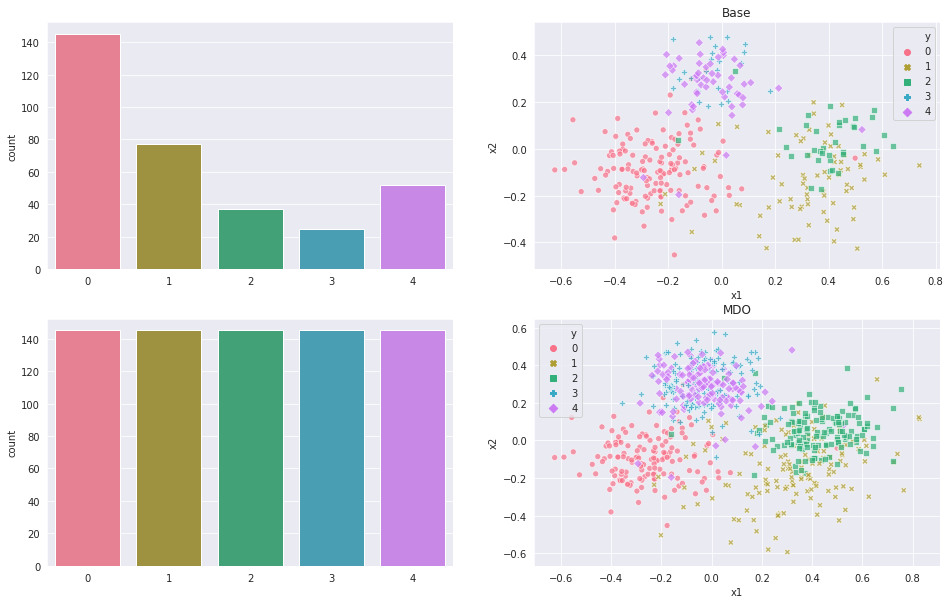

In [41]:
n = len(Counter(y).keys())
p = sns.color_palette("husl", n)

pca = PCA(n_components=2)
pca.fit(X)

fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches( 16, 10)
axs = axs.flatten()

axs[1].set_title("Base")
sns.countplot(y, ax=axs[0], palette=p)
X = pca.transform(X)
df = construct_flat_2pc_df(X, y)
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df, alpha=0.7, ax=axs[1], legend='full', palette=p)


axs[3].set_title("MDO")
sns.countplot(resampled_y, ax=axs[2],palette=p)
resampled_X = pca.transform(resampled_X)
df = construct_flat_2pc_df(resampled_X, resampled_y)
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df, alpha=0.7, ax=axs[3], legend='full', palette=p)